In [1]:
import graphviz as gv
import numpy as np
from IPython.display import Image

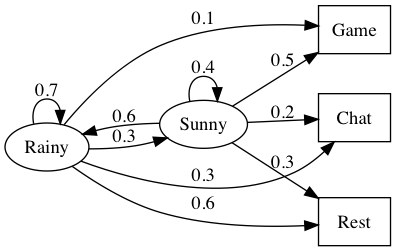

In [2]:
g = gv.Digraph(format="png")
g.graph_attr['rankdir'] = 'LR'
    
r,s,ga,ch,re = "Rainy","Sunny","Game","Chat","Rest"


g.node(ga,_attributes={'shape':'box'})
g.node(ch,_attributes={'shape':'box'})
g.node(re,_attributes={'shape':'box'})

g.edge(r,s,"0.3")
g.edge(r,r,"0.7")
g.edge(s,r,"0.6")
g.edge(s,s,"0.4")

g.edge(r,ga,"0.1")
g.edge(r,ch,"0.3")
g.edge(r,re,"0.6")

g.edge(s,ga,"0.5")
g.edge(s,ch,"0.2")
g.edge(s,re,"0.3")
g.render("hmm")
Image("hmm.png")

In [3]:
a = [[0.7,0.3],[0.6,0.4]]
b= [[0.1,0.3,0.6],[0.5,0.2,0.3]]
pi = [0.7,0.3]
O = [0,1,1]
prob = 0.0
n,m = 2,3
su = 0.0
for s_ in range(n):
    for o_ in range(m):
        for s__ in range(n): 
            for o__ in range(m):
                for s___ in range(n): 
                    for o___ in range(m):
                        pq = pi[s_]*a[s_][s__]*a[s__][s___]
                        poq = b[s_][o_]*b[s__][o__]*b[s___][o___]
#                         print(pq*poq)
#                         su+=pq*poq
su = 0.0
o_,o__,o___ = O
for s_ in range(n):
        for s__ in range(n): 
                for s___ in range(n): 
                        pq = pi[s_]*a[s_][s__]*a[s__][s___]
                        poq = b[s_][o_]*b[s__][o__]*b[s___][o___]
#                         print(pq*poq)
                        su+=pq*poq
print(su)

0.015470999999999997


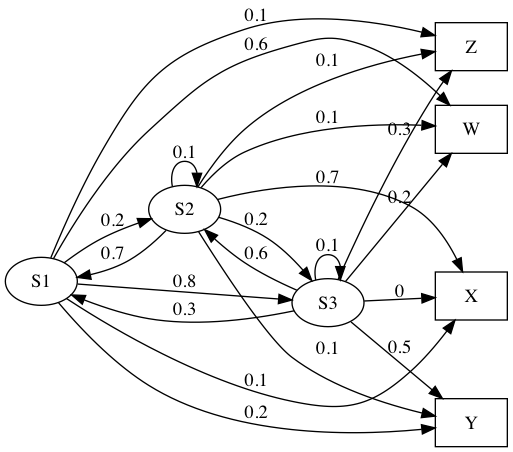

In [4]:
g = gv.Digraph(format="png")
g.graph_attr['rankdir'] = 'LR'
    
g.node("W",_attributes={'shape':'box'})
g.node("X",_attributes={'shape':'box'})
g.node("Y",_attributes={'shape':'box'})
g.node("Z",_attributes={'shape':'box'})

g.edge("S1","S2","0.2")
g.edge("S1","S3","0.8")

g.edge("S2","S1","0.7")
g.edge("S2","S2","0.1")
g.edge("S2","S3","0.2")

g.edge("S3","S1","0.3")
g.edge("S3","S2","0.6")
g.edge("S3","S3","0.1")

g.edge("S1","W","0.6")
g.edge("S1","X","0.1")
g.edge("S1","Y","0.2")
g.edge("S1","Z","0.1")

g.edge("S2","W","0.1")
g.edge("S2","X","0.7")
g.edge("S2","Y","0.1")
g.edge("S2","Z","0.1")

g.edge("S3","W","0.2")
g.edge("S3","X","0")
g.edge("S3","Y","0.5")
g.edge("S3","Z","0.3")


g.render("hmm2")
Image("hmm2.png")

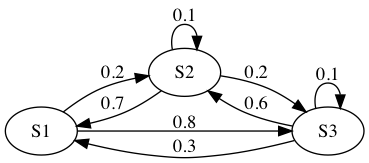

In [5]:
g = gv.Digraph(format="png")
g.graph_attr['rankdir'] = 'LR'

g.edge("S1","S2","0.2")
g.edge("S1","S3","0.8")

g.edge("S2","S1","0.7")
g.edge("S2","S2","0.1")
g.edge("S2","S3","0.2")

g.edge("S3","S1","0.3")
g.edge("S3","S2","0.6")
g.edge("S3","S3","0.1")

g.render("markov_chain_state")
Image("markov_chain_state.png")

In [6]:
states = ('Healthy', 'Fever')
observations = ('normal', 'cold', 'dizzy')
start_probability = {'Healthy': 0.6, 'Fever': 0.4}
transition_probability = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
    'Fever' : {'Healthy': 0.4, 'Fever': 0.6}
    }
emission_probability = {
    'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}    }

In [7]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = max(V[t-1][prev_st]["prob"]*trans_p[prev_st][st] for prev_st in states)
            for prev_st in states:
                if V[t-1][prev_st]["prob"] * trans_p[prev_st][st] == max_tr_prob:
                    max_prob = max_tr_prob * emit_p[st][obs[t]]
                    V[t][st] = {"prob": max_prob, "prev": prev_st}
                    break
#     for line in dptable(V):
#         print (line)
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

#     print ('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)
    return ("".join(list(map(lambda x: x[1],opt))))
def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)

In [8]:
viterbi(observations,states,start_probability,transition_probability,emission_probability)

'eee'

In [9]:
A = np.array([[0.0,0.2,0.8],[0.7,0.1,0.2],[0.3,0.6,0.1]])
pt = np.array([[0.6,0.3,0.1]]).T

In [10]:
for i in range(100000):
    pt = A.T.dot(pt)
print(pt)

[[ 0.32701422]
 [ 0.31279621]
 [ 0.36018957]]


In [11]:
pi = pt.T[0]

In [12]:
#importing files
import glob
ipfiles = (glob.glob("input*"))

In [13]:
for f in ipfiles:
    fd=open(f)
    inp = fd.readlines()[0].strip()
    observations = list(inp)

    # inp = "XWZYWZXWXW"
    # observations = list(inp)

    states = ('S1', 'S2','S3')
    # observations = ('W', 'X', 'Y','Z')
    start_probability = {'S1': 0.32701422, 'S2': 0.31279621,'S3':0.36018957}
    transition_probability = {
        'S1' : {'S1': 0.0, 'S2': 0.2, 'S3': 0.8},
        'S2' : {'S1': 0.7, 'S2': 0.1, 'S3': 0.2},
        'S3' : {'S1': 0.3, 'S2': 0.6, 'S3': 0.1},
        }
    emission_probability = {
        'S1' : {'W': 0.6, 'X': 0.1, 'Y': 0.2, 'Z': 0.1},
        'S2' : {'W': 0.1, 'X': 0.7, 'Y': 0.1, 'Z': 0.1},
        'S3' : {'W': 0.2, 'X': 0., 'Y': 0.5, 'Z': 0.3},
    }
    fd2 = open("/".join(f.split("/")[:-1]+["output"+f.split("/")[-1][5:]]),"w")
    v = viterbi(observations,states,start_probability,transition_probability,emission_probability)
    fd2.write(str(v)+"\n")
    fd2.close()

In [14]:
f = ipfiles[0]
["output"+f.split("/")[-1][5:]]

['output1.txt']

In [15]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = max(V[t-1][prev_st]["prob"]*trans_p[prev_st][st] for prev_st in states)
            for prev_st in states:
                if V[t-1][prev_st]["prob"] * trans_p[prev_st][st] == max_tr_prob:
                    max_prob = max_tr_prob * emit_p[st][obs[t]]
                    V[t][st] = {"prob": max_prob, "prev": prev_st}
                    break
    for line in dptable(V):
        print (line)
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)
    return ("".join(list(map(lambda x: x[1],opt))))
def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)

In [16]:
states = ('Rainy', 'Sunny')
observations = ('Game', 'Chat', 'Chat',"Chat")
start_probability = {'Rainy': 0.7, 'Sunny': 0.3}
transition_probability = {
   'Rainy' : {'Rainy': 0.7, 'Sunny': 0.3},
    'Sunny' : {'Rainy': 0.6, 'Sunny': 0.4}
    }
emission_probability = {
    'Rainy' : {'Game': 0.1, 'Chat': 0.3, 'Rest': 0.6},
    'Sunny' : {'Game': 0.5, 'Chat': 0.2, 'Rest': 0.3}    }

In [17]:
viterbi(observations,states,start_probability,transition_probability,emission_probability)

           0            1            2            3
Rainy: 0.07000 0.02700 0.00567 0.00119
Sunny: 0.15000 0.01200 0.00162 0.00034
The steps of states are Sunny Rainy Rainy Rainy with highest probability of 0.0011906999999999998


'uaaa'